# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('/datasets/real_estate_data.csv',  sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',  sep='\t')

display(df)
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видим пропуски и разные типы данных: bool(2), float64(14), int64(3), object(3)

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

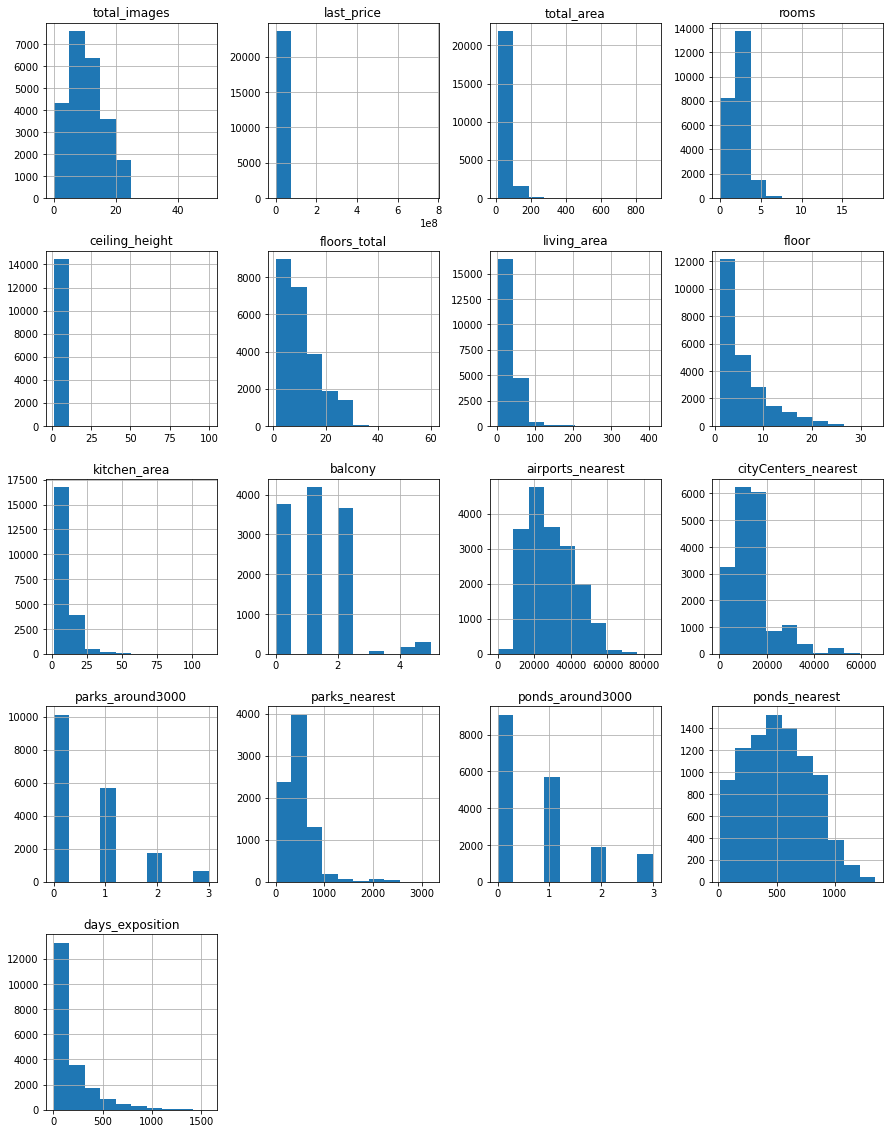

In [2]:
df.hist(figsize=(15, 20))

Видно, что есть аномально большие значения, есть над чем поработать.

### Предобработка данных

In [3]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

У нас достаточно много столбцов с пропусками, начнем их анализировать.

#### Столбец 'locality_name'

Добавим столбец 'locality_name_ndx' на основе 'locality_name', чтобы потом с его помощью заполнять пропуски медианными значениями. Идея такова: населенные пункты строились в разное время по каким-то единым стандартам к планировке помещений (от деревень до современных кварталов), а значит в них должны быть помещения со схожими характеристиками и низкими отклонениями от медианы. Поэтому предлагаю заменять пропуски в столбцах медианными значениями для этого города. Также заменим в столбце 'locality_name' "ё" на "е" и уберем административное деление (поселок, село, садоводство и т.д.). Можно было использовать сортировку на основе заглавных букв в именах собственных населенных пунктов, но в случае опечатки мы могли бы потерять значения. Можно еще привести все к строчному регистру, но в обработке дубликатов нам это никак не поможет, поэтому оставим как есть, так красивее выглядит.

In [4]:
# заменяем ё на е
df['locality_name_ndx'] = df['locality_name'].str.replace('ё','е')

# убираем административное деление населенных пунктов из названий
# в названиях вспомогательных переменных я не использую гласные, потому что мозг устроен так,
# что он сам достраивает недостающие части слов по мере чтения, например: rplc - replace. Это экономит место и время.
rplc = ['деревня ', 'поселок ', 'городского ', 'типа ', 'село ', 'станции ', 'городской ', 'садовое ', 'коттеджный ', 'при ', 'садоводческое ',
        'некоммерческое ', 'железнодорожной ', 'товарищество ', 'имени ', 'Пансионат ']
for x in rplc:
    df['locality_name_ndx'] = df['locality_name_ndx'].str.replace(x,'')

# выводим уникальные значения населенных пунктов и сортируем их
x = df['locality_name_ndx'].unique().astype(str)
x.sort()
x

array(['nan', 'Агалатово', 'Александровская', 'Алексеевка', 'Аннино',
       'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зеленый Бор', 'Зимитицы',

Визуально проверили список на дубликаты и опечатки. Дальше будем бороться с пропусками.

#### Функция f1

НАпишим фукнцию f1 для обработки пропусков. Суть работы функции в том, что мы будем искать в данных помещений признаки того, что они относятся к одному объекту. Логично, что в помещениях, которые находятся в одном здании, должны быть одинаковые значения столбцов: 'floors_total', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'. Если мы найдем признаки принадлежности к одному зданию, то можно попробовать заполнить пропуски в объекте на основании данных с других объектов этого же здания.

Чтобы обработать пропуски в столбце 'locality_name', нам надо как-то идентифицировать здания. Это мы будем делать с помощью переменных 'airports_nearest' и 'cityCenters_nearest'. Эти переменные представляют собой расстояние в метрах от здания до аэропорта и от здания до центра города. В Санкт-Петербурге и Ленинградской облости только один аэропорт Пулково. Центр города привязан к городу ('locality_name'). Представим 'airports_nearest' и 'cityCenters_nearest' как радиусы двух окружностей. В точках пересечения этих окружностей (с точностью до метра) будет располагаться наше здание. Стоит отметить, что таких точек может 2, независимо от того касаются окружности друг друга или они пересекаются. Этим можно пренебречь, потому что в обоих случаях здание будет относиться к одному и тому же городу.

Функция должна вернуть массив с уникальными значениями столбцов clmn_vls1 и clmn_vls2, которым будет соответствовать значение clmn_na, где:
   - clmn_na - аргумент функции, принимающий значение столбца исходного датафрейма, где нам требуется заменить пропуск.
   - clmn_vls1, clmn_vls2 - аргумент функции, принимающий значение столбца исходного датафрейма, по которому мы будем определять уникальность строения.
   - clmn_srt - аргумент функции, неоходим для сортировки выходных данных.
   - Массив df_f1_1 возвращает нам значения clmn_vls1 и clmn_vls2, при условии, что clmn_na - пропуск. Массив сортируется по clmn_srt, удаляются пропуски.
   - Массив df_f1_2 возвращает нам значения clmn_vls1, clmn_vls2 и clmn_na, при условии, что clmn_na - не пропуск. Массив сортируется по clmn_srt, удаляются пропуски и дубликаты.
   - Результат функции - массив полученный путем добавления df_f1_2 к df_f1_1 по уникальным значениям clmn_vls1 и clmn_vls2.

**Другими словами мы сначала ищем массив с пропусками названия города, потом ищем массив, где есть названия городов, и по ключевым сочетаниям пересечения радиусов добавляем в пропуски названия города.**

Я понимаю, что в "полете чужой мысли" тяжело разбираться, поэтому ниже распишу по шагам все операции функции с выводом значений для наглядности и экономии времени.

In [5]:
def f1(clmn_na, clmn_vls1, clmn_vls2, clmn_srt):
    try:
        df_f1_1  = df.loc[(df[clmn_na].isna()), [clmn_vls1, clmn_vls2]].sort_values(by = clmn_srt).dropna()
        df_f1_2 = df.loc[(df[clmn_na].notna()), [clmn_vls1, clmn_vls2, clmn_na]].sort_values(by = clmn_srt).drop_duplicates().dropna()
        result = df_f1_1.merge(df_f1_2, on = [clmn_vls1, clmn_vls2], how = 'left').drop_duplicates().dropna()
    except:
        result = 'Error f1'
    return result

In [6]:
df21 = f1(clmn_na = 'locality_name_ndx', clmn_vls1 = 'airports_nearest', clmn_vls2 = 'cityCenters_nearest', clmn_srt = 'airports_nearest')
df21

,airports_nearest,cityCenters_nearest,locality_name_ndx
3,14031.0,8582.0,Санкт-Петербург
7,21219.0,1322.0,Санкт-Петербург
8,21460.0,16788.0,Санкт-Петербург
11,21731.0,8619.0,Санкт-Петербург
13,22041.0,17369.0,Санкт-Петербург
26,24953.0,3801.0,Санкт-Петербург
27,25054.0,3902.0,Санкт-Петербург
28,25221.0,4069.0,Санкт-Петербург
32,26090.0,4805.0,Санкт-Петербург
38,37123.0,12332.0,Санкт-Петербург


**Разбор работы функции:**

Делаем срез для массива df_f1_1:

In [7]:
df_f1_1_tst = df.loc[(df['locality_name_ndx'].isna()), ['airports_nearest', 'cityCenters_nearest']].sort_values(by = 'airports_nearest').dropna()
df_f1_1_tst

,airports_nearest,cityCenters_nearest
5343,10556.0,9538.0
23214,11206.0,8943.0
18526,11206.0,8943.0
7114,14031.0,8582.0
8986,19659.0,31813.0
21119,19744.0,31897.0
13690,20234.0,23659.0
16610,21219.0,1322.0
5707,21460.0,16788.0
18917,21540.0,8429.0


Делаем срез для массива df_f1_2:

In [8]:
df_f1_2_tst = df.loc[(df['locality_name_ndx'].notna()), ['airports_nearest', 'cityCenters_nearest', 'locality_name_ndx']].sort_values(by = 'airports_nearest').drop_duplicates().dropna()
df_f1_2_tst

,airports_nearest,cityCenters_nearest,locality_name_ndx
21085,0.0,22801.0,Санкт-Петербург
4017,6450.0,17461.0,Санкт-Петербург
7778,6914.0,21486.0,Санкт-Петербург
23150,6949.0,13165.0,Санкт-Петербург
15633,6989.0,13205.0,Санкт-Петербург
...,...,...,...
5218,83758.0,64857.0,Молодежное
20746,84006.0,65105.0,Молодежное
577,84665.0,65764.0,Молодежное
5340,84853.0,65952.0,Молодежное


In [9]:
# это пример для проверки поведения функции в случае, когда одному радиусу аэропорта соответствуют помещения в разных городах.
df.loc[(df['airports_nearest'] == 25054.0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_ndx
1531,20,22315000.0,145.0,2015-05-21T00:00:00,4,2.7,8.0,94.54,3,NaN,...,0.0,Санкт-Петербург,25054.0,3902.0,1.0,485.0,3.0,722.0,599.0,Санкт-Петербург
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.0,8.0,39.62,7,NaN,...,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,NaN
9541,1,35953504.0,188.4,2015-09-20T00:00:00,5,3.0,8.0,91.77,8,False,...,NaN,Санкт-Петербург,25054.0,3902.0,1.0,485.0,3.0,722.0,1318.0,Санкт-Петербург
12126,6,14790000.0,67.5,2017-11-10T00:00:00,2,NaN,8.0,35.00,7,NaN,...,1.0,Санкт-Петербург,25054.0,3902.0,1.0,485.0,3.0,722.0,113.0,Санкт-Петербург
23286,5,2450000.0,32.0,2017-03-09T00:00:00,1,2.5,9.0,20.00,1,NaN,...,NaN,посёлок Металлострой,25054.0,26766.0,0.0,NaN,0.0,NaN,454.0,Металлострой


Объединяем массивы для конечного результата функции:

In [10]:
df21_tst = df_f1_1_tst.merge(df_f1_2_tst, on = ['airports_nearest', 'cityCenters_nearest'], how = 'left').drop_duplicates().dropna()
df21_tst

,airports_nearest,cityCenters_nearest,locality_name_ndx
3,14031.0,8582.0,Санкт-Петербург
7,21219.0,1322.0,Санкт-Петербург
8,21460.0,16788.0,Санкт-Петербург
11,21731.0,8619.0,Санкт-Петербург
13,22041.0,17369.0,Санкт-Петербург
26,24953.0,3801.0,Санкт-Петербург
27,25054.0,3902.0,Санкт-Петербург
28,25221.0,4069.0,Санкт-Петербург
32,26090.0,4805.0,Санкт-Петербург
38,37123.0,12332.0,Санкт-Петербург


In [11]:
df21 == df21_tst

,airports_nearest,cityCenters_nearest,locality_name_ndx
3,True,True,True
7,True,True,True
8,True,True,True
11,True,True,True
13,True,True,True
26,True,True,True
27,True,True,True
28,True,True,True
32,True,True,True
38,True,True,True


Функция соответствует пошаговому решению. Теперь можно заменить пропуски в столбцах 'locality_name' и 'locality_name_ndx'. Т.к. функция вернула только значение 'Санкт-Петербург', то мы просто его туда вставим.

In [12]:
for x in df21['airports_nearest'].unique():
    df.loc[(df['airports_nearest'] == x) & (df['locality_name_ndx'].isna()), 'locality_name_ndx'] = 'Санкт-Петербург'
    
for x in df21['airports_nearest'].unique():
    df.loc[(df['airports_nearest'] == x) & (df['locality_name'].isna()), 'locality_name'] = 'Санкт-Петербург'

In [13]:
# вернемся к примеру для проверки поведения функции в случае, когда одному радиусу аэропорта соответствуют помещения в разных городах.
# Все вставилось как надо.
df.loc[(df['airports_nearest'] == 25054.0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_ndx
1531,20,22315000.0,145.0,2015-05-21T00:00:00,4,2.7,8.0,94.54,3,NaN,...,0.0,Санкт-Петербург,25054.0,3902.0,1.0,485.0,3.0,722.0,599.0,Санкт-Петербург
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.0,8.0,39.62,7,NaN,...,0.0,Санкт-Петербург,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,Санкт-Петербург
9541,1,35953504.0,188.4,2015-09-20T00:00:00,5,3.0,8.0,91.77,8,False,...,NaN,Санкт-Петербург,25054.0,3902.0,1.0,485.0,3.0,722.0,1318.0,Санкт-Петербург
12126,6,14790000.0,67.5,2017-11-10T00:00:00,2,NaN,8.0,35.00,7,NaN,...,1.0,Санкт-Петербург,25054.0,3902.0,1.0,485.0,3.0,722.0,113.0,Санкт-Петербург
23286,5,2450000.0,32.0,2017-03-09T00:00:00,1,2.5,9.0,20.00,1,NaN,...,NaN,посёлок Металлострой,25054.0,26766.0,0.0,NaN,0.0,NaN,454.0,Металлострой


In [14]:
# оценим оставшиеся пропуски в столбце 'locality_name_ndx'
df['locality_name_ndx'].isna().sum()

31

После применения функции остался 31 пропуск. Это меньше 1%, значит ими можно пренебречь. Удалим эти строки.

In [15]:
df = df.dropna(subset = ['locality_name_ndx']).reset_index(drop=True)

#### Столбец 'floors_total'

Применим функцию f1 для нахождения пропусков, которые можно заменить в столбце 'floors_total'.

In [16]:
df23 = f1(clmn_na = 'floors_total', clmn_vls1 = 'airports_nearest', clmn_vls2 = 'cityCenters_nearest', clmn_srt = 'airports_nearest')
df23

,airports_nearest,cityCenters_nearest,floors_total
0,7050.0,13266.0,4.0
3,8426.0,12082.0,23.0
4,8426.0,12082.0,22.0
5,8426.0,12082.0,16.0
6,8426.0,12082.0,25.0
...,...,...,...
156,51340.0,15363.0,19.0
157,51340.0,15363.0,25.0
158,51340.0,15363.0,20.0
159,51340.0,15363.0,21.0


Итак мы видим, что у нас слишком много уникальных значений 'floors_total' для одного здания. Наш способ допускает наличие 2-х зданий с одинаковыми значениями радиусов до аэропорта и до центра города. Давайте сделаем срез данных и посмотрим подробнее.

In [17]:
df.loc[(df['airports_nearest'] == 17720.0), ['airports_nearest', 'cityCenters_nearest', 'locality_name_ndx', 'floors_total']].drop_duplicates()

,airports_nearest,cityCenters_nearest,locality_name_ndx,floors_total
744,17720.0,16722.0,Санкт-Петербург,10.0
3972,17720.0,16722.0,Санкт-Петербург,5.0
7110,17720.0,16722.0,Санкт-Петербург,7.0
7655,17720.0,16722.0,Санкт-Петербург,NaN
8814,17720.0,16722.0,Санкт-Петербург,2.0
10429,17720.0,16722.0,Санкт-Петербург,12.0
10609,17720.0,16722.0,Санкт-Петербург,6.0
14630,17720.0,16722.0,Санкт-Петербург,16.0
15066,17720.0,16722.0,Санкт-Петербург,20.0
21063,17720.0,16722.0,Санкт-Петербург,14.0


**Проверяя работу функции f1 мы получили, что у одного и того же здания может быть 10 разных значений (от 2 до 20) параметра 'floors_total'. Возможно, 'floors_total' указывается отдельно для каждой парадной, а не для здания в целом, но таких домов я никогда не встречал. Возможно, ошибка в выгрузке. Возможно привязка координат идет не к зданию, а к целому жк. Как это еще можно объяснить я вообще не понимаю. Тут нужно консультироваться с командой Яндекс Недвижимости, предоставившей данные. Есть много вопросов.**

Понятно, что таким способом заполнить пропуски у нас не получится. Поэтому придется удалить 86 пропусков.

In [18]:
df = df.dropna(subset = ['floors_total']).reset_index(drop=True)

#### Столбец 'ceiling_height'

В столбце 'ceiling_height' есть аномальные значения, но их меньше 1%. Ими можно пренебречь и просто удалить, но мы постараемся сохранить все, что сможем. Поэтому предлагаю все значения больше 8 разделить на 10, а потом удалить данные, где значение 'ceiling_height' менее 2. Потом уже заняться пропусками.

In [19]:
df.loc[df['ceiling_height'] >= 80, 'ceiling_height'] /= 100
df.loc[df['ceiling_height'] >= 8, 'ceiling_height'] /= 10
df = df.query('ceiling_height > 2 | ceiling_height.isnull()').reset_index(drop=True)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_ndx
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23556,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,Санкт-Петербург
23557,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Тосно
23558,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Рождествено
23559,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,Санкт-Петербург


In [20]:
df['ceiling_height'].isna().sum()

9097

В столбце очень много пропусков (9097). Удалять данные не хочется, поэтому предлагаю заполнить пропуски в каждом населенном пункте медианным значением 'ceiling_height' для этого населенного пункта. Не все пропуски получится заполнить. Если оставшихся будет меньше 1%, то мы их просто удалим.

In [21]:
for x in df['locality_name_ndx'].unique():
    try:
        df.loc[(df['locality_name_ndx'] == x) & (df['ceiling_height'].isna()), 'ceiling_height'] = \
        df.loc[(df['locality_name_ndx'] == x), 'ceiling_height'].median()
    except:
        pass

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [22]:
df['ceiling_height'].isna().sum()

95

Удаляем оставшиеся 95 пропусков.

In [23]:
df = df.dropna(subset = ['ceiling_height']).reset_index(drop=True)

<AxesSubplot:>

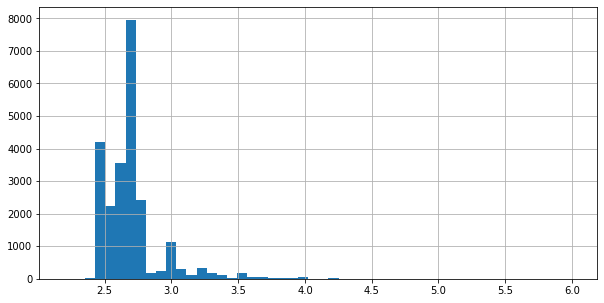

In [24]:
df['ceiling_height'].hist(figsize = (10, 5), bins = 50)

#### Столбцы 'balcony' и 'is_apartment'

В столбце 'balcony' будем считать, что пропуски - это отсутствие балконов. Поэтому пропуски заполняем 0.<br>
В столбце 'is_apartment', по аналогии заполняем пропуски значением False.

In [25]:
df.loc[(df['balcony'].isna()), 'balcony'] = 0

In [26]:
df.loc[(df['is_apartment'].isna()), 'is_apartment'] = False

#### Столбец 'days_exposition'

Пропуски в столбце 'days_exposition' говорят о том, что объявление на момент среза базы еще не сняли. Допустим, что срез данных был взят в последний по возрастанию день столбца 'first_day_exposition'. Тогда пропуски в столбце 'days_exposition' предлагаю заполнять разностью между значением 'first_day_exposition' и днем, когда был взят срез базы ('first_day_exposition'.max() - 'first_day_exposition'). Будет погрешность, потому что мы неснятым объявлениям присваиваем свойство снятых, но это лучше, чем просто удалить данные.

In [27]:
# меняем формат столбца 'first_day_exposition'
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M')
# находим день среза базы
df['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

In [28]:
# заполняем столбец 'days_exposition'
df.loc[(df['days_exposition'].isna()), 'days_exposition'] = (df['first_day_exposition'].max() - df['first_day_exposition']).dt.days

#### Столбцы 'kitchen_area' и 'living_area'

Логично будет предположить, что в квартирах студиях и квартирах с открытой планировкой нет кухни. Поэтому столбец 'kitchen_area' заполняем 0, с условиями 'studio' == True ИЛИ 'open_plan' == True. Пропуски в столбцах 'kitchen_area' и 'living_area' заполним медианными значениями 'total_area' для этих столбцов. Оставшиеся пропуски, если их будет меньше 1%, просто удалим.

In [29]:
df.loc[(df['studio'] == True) | (df['open_plan'] == True), 'kitchen_area'] = df.loc[(df['studio'] == True) | (df['open_plan'] == True), 'kitchen_area'].fillna(0)

In [30]:
# оцениваем пропуски
df['kitchen_area'].isna().sum()

1983

In [31]:
# пропуски в 'kitchen_area' заполним медианными значениями 'total_area' для этих столбцов
for x in df['total_area'].unique():
    try:
        df.loc[(df['total_area'] == x) & (df['kitchen_area'].isna()), 'kitchen_area'] = \
        df.loc[(df['total_area'] == x), 'kitchen_area'].median()
    except:
        pass

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [32]:
df['kitchen_area'].isna().sum()

105

In [33]:
df['living_area'].isna().sum()

1841

In [34]:
# пропуски в 'living_area' заполним медианными значениями 'total_area' для этих столбцов
for x in df['total_area'].unique():
    try:
        df.loc[(df['total_area'] == x) & (df['living_area'].isna()), 'living_area'] = \
        df.loc[(df['total_area'] == x), 'living_area'].median()
    except:
        pass

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [35]:
df['living_area'].isna().sum()

133

Удаляем 105 пропусков в столбце 'kitchen_area' и 133 в столбце 'living_area'

In [36]:
df = df.dropna(subset = ['living_area']).reset_index(drop=True)
df = df.dropna(subset = ['kitchen_area']).reset_index(drop=True)

#### Столбцы 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000' и 'ponds_nearest'

In [37]:
# оцениваем пропуски
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5366
cityCenters_nearest      5343
parks_around3000         5342
parks_nearest           15312
ponds_around3000         5342
ponds_nearest           14318
days_exposition             0
locality_name_ndx           0
dtype: int64

В столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000' практически одинаковое количество пропусков. Давайте поищем взаимосвязь.

In [38]:
#Попробуем вывести строки, где в этих столбцах пропуски
df28 = df.query('airports_nearest.isnull() & cityCenters_nearest.isnull() & parks_around3000.isnull() & parks_nearest.isnull() & ponds_around3000.isnull() & ponds_nearest.isnull()')
df28

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_ndx
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,False,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино
12,10,3890000.0,54.00,2016-06-30,2,2.60,5.0,30.00,5,False,...,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,Сертолово
22,20,5000000.0,58.00,2017-04-24,2,2.75,25.0,30.00,15,False,...,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,Кудрово
30,12,2200000.0,32.80,2018-02-19,1,2.56,9.0,17.50,2,False,...,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,Коммунар
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23255,11,2350000.0,35.60,2016-06-23,1,2.50,5.0,17.00,4,False,...,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0,Выборг
23256,16,2100000.0,62.80,2018-09-18,4,2.50,5.0,45.50,3,False,...,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,227.0,Дзержинского
23265,2,1350000.0,30.00,2017-07-07,1,2.60,5.0,17.50,4,False,...,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,Тихвин
23268,14,3100000.0,59.00,2018-01-15,3,2.50,5.0,38.00,4,False,...,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Тосно


Есть строки, в которых все значения столбцов 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000' и 'ponds_nearest' - пропуски. Проверим есть ли населенные пункты в которых все строки этих столбцов пустые.

Создадим таблицу 'df28_1' на основе 'df', где:
 - 'locality_name_ndx' - название города
 - 'locality_name_ndx' - количество строк в массиве 'df'

In [39]:
df28_1 = pd.pivot_table(
            df, 
            index = 'locality_name_ndx',
            values = 'last_price',
            aggfunc = len
            )
df28_1 = df28_1.rename(columns = {"last_price" : "All_values"})
df28_1

,All_values
locality_name_ndx,
Агалатово,4.0
Александровская,2.0
Аннино,16.0
Барышево,2.0
Батово,9.0
...,...
Щеглово,23.0
Юкки,5.0
Ялгино,1.0


Создадим таблицу 'df28_2' на основе 'df28' (все значения в столбцах - пропуски), где:
 - 'locality_name_ndx' - название города
 - 'locality_name_ndx' - количество строк в массиве 'df28'

In [40]:
df28_2 = pd.pivot_table(
            df28, 
            index = 'locality_name_ndx',
            values = 'last_price',
            aggfunc = len
            )
df28_2 = df28_2.rename(columns = {"last_price" : "NaN_values"})
df28_2

,NaN_values
locality_name_ndx,
Агалатово,4.0
Аннино,16.0
Барышево,2.0
Батово,9.0
Бегуницы,17.0
...,...
Щеглово,23.0
Юкки,5.0
Ялгино,1.0


Объединим таблицы, чтобы понять соотношение пустых строк ко всем строкам по городам.

In [41]:
df28_3 = df28_2.merge(df28_1, on = ['locality_name_ndx'], how = 'left')
df28_3

,NaN_values,All_values
locality_name_ndx,,
Агалатово,4.0,4.0
Аннино,16.0,16.0
Барышево,2.0,2.0
Батово,9.0,9.0
Бегуницы,17.0,17.0
...,...,...
Щеглово,23.0,23.0
Юкки,5.0,5.0
Ялгино,1.0,1.0


Вернем из объединенной таблице только те строки с городами, где есть заполненные значения в столбцах.

In [42]:
df28_4 = df28_3.loc[(df28_3['NaN_values'] != df28_3['All_values'])]
df28_4

,NaN_values,All_values
locality_name_ndx,,
Колпино,1.0,337.0
Красное Село,2.0,175.0
Кронштадт,1.0,96.0
Ломоносов,1.0,133.0
Санкт-Петербург,57.0,15524.0
Шушары,3.0,439.0


Таких городов всего 6, пропусков очень мало, это полностью случайные пропуски. Посмотрим теперь на города, где все значения столбцов - пропуски.

In [43]:
df28_5 = df28_3.loc[(df28_3['NaN_values'] == df28_3['All_values'])]
df28_5

,NaN_values,All_values
locality_name_ndx,,
Агалатово,4.0,4.0
Аннино,16.0,16.0
Барышево,2.0,2.0
Батово,9.0,9.0
Бегуницы,17.0,17.0
...,...,...
Щеглово,23.0,23.0
Юкки,5.0,5.0
Ялгино,1.0,1.0


**Есть населенные пункты, в которых все значения столбцов 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000' и 'ponds_nearest' - пропуски. Возможно, это ошибка выгрузки данных, либо эти населенные пункты настолько малы, что по ним эти данные не собирались. Тут стоит уточнить данные у команды сервиса Яндекс Недвижимости. Чтобы не удалять ценные данные, при необходимости дальнейшего анализа, будем работать со срезами. Все равно постараемся предобработать данные и подготовить их к анализу.**

Найдем эти населенные пункты.

In [44]:
df28_5.reset_index(inplace=True)
df28_5['locality_name_ndx'].tolist()

['Агалатово',
 'Аннино',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпоселок',
 'Житково',
 'Заводской',
 'Заневка',
 'Запорожское',
 'Зеленый Бор',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичево',
 'Калитино',
 'Кальтино',
 'Каменногорск',
 'Камышовка',
 'Каськово',
 'Келози',
 'Кивеннапа Север',
 'Кикерино',
 'Кингисепп',
 'Кингисеппский',
 'Кипень',
 'Кириши',
 'Кировск',
 'Кисельня',
 

Теперь, чтобы удалить случайные пропуски в изучаемых столбцах, вернем оставшуюся часть датафрейма (те строки, где есть хоть одно заполненное значение в этих столбцах)

In [45]:
df28_6 = df.query('airports_nearest.notnull() | cityCenters_nearest.notnull() | parks_around3000.notnull() | parks_nearest.notnull() | ponds_around3000.notnull() | ponds_nearest.notnull()')
df28_6

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_ndx
0,20,13000000.0,108.00,2019-03-07,3,2.700,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57.0,Санкт-Петербург
1,7,3350000.0,40.40,2018-12-04,1,2.615,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.00,2015-08-20,2,2.700,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.00,2015-07-24,3,2.700,14.0,95.0,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.00,2018-06-19,2,3.030,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23262,13,3550000.0,35.30,2018-02-28,1,2.860,15.0,16.3,4,False,...,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,Санкт-Петербург
23263,3,5500000.0,52.00,2018-07-19,2,2.700,5.0,31.0,2,False,...,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,Санкт-Петербург
23264,11,9470000.0,72.90,2016-10-13,2,2.750,25.0,40.3,7,False,...,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,Санкт-Петербург
23266,9,4600000.0,62.40,2016-08-05,3,2.600,9.0,40.0,8,False,...,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,Петергоф


Оценим пропуски в данных:

In [46]:
df28_6.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest          24
cityCenters_nearest        1
parks_around3000           0
parks_nearest           9970
ponds_around3000           0
ponds_nearest           8976
days_exposition            0
locality_name_ndx          0
dtype: int64

У нас 25 пропусков в столбцах 'airports_nearest' и 'cityCenters_nearest'. Попробуем с ними что-то сделать, начнем с 'cityCenters_nearest'.

In [47]:
df28_6[(df28_6['cityCenters_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_ndx
19824,2,10500000.0,85.0,2019-01-08,3,3.0,3.0,55.5,2,False,...,1.0,Пушкин,15527.0,NaN,1.0,134.0,0.0,NaN,115.0,Пушкин


Присвоим идекс этой строки переменной 'df_index1'.

In [48]:
df_ndx1 = df28_6[(df28_6['cityCenters_nearest'].isna())].index
df_ndx1

Int64Index([19824], dtype='int64')

Проделаем тоже самое со столбцом 'airports_nearest':

In [49]:
df_ndx2 = df28_6[(df28_6['airports_nearest'].isna())].index
df_ndx2

Int64Index([  723,   963,  2378,  7391,  7412,  7879,  8486,  8905,  9718,
            10483, 11243, 11254, 12185, 12882, 14037, 16196, 16544, 16644,
            17905, 18230, 20701, 21386, 22379, 22704],
           dtype='int64')

Объединим переменные с индексами в одну, чтобы получить индексы строк с пропусками.

In [50]:
df_ndx = df_ndx2.append(df_ndx1)
df_ndx

Int64Index([  723,   963,  2378,  7391,  7412,  7879,  8486,  8905,  9718,
            10483, 11243, 11254, 12185, 12882, 14037, 16196, 16544, 16644,
            17905, 18230, 20701, 21386, 22379, 22704, 19824],
           dtype='int64')

Вернемся к функции f1, добавим туда больше столбцов для ключевых значений:

In [51]:
def f2(clmn_na1, clmn_na2, clmn_vls1, clmn_vls2, clmn_vls3, clmn_vls4, clmn_vls5, clmn_vls6, clmn_srt):
    try:
        df_f2_1  = df.loc[(df[clmn_na1].isna()) & (df[clmn_na2].notna()), [clmn_vls1, clmn_vls2, clmn_vls3, clmn_vls4, clmn_vls5, clmn_vls6]].sort_values(by = clmn_srt).drop_duplicates()
        df_f2_2 = df.loc[(df[clmn_na1].notna()) & (df[clmn_na2].notna()), [clmn_vls1, clmn_vls2, clmn_vls3, clmn_vls4, clmn_vls5, clmn_vls6, clmn_na1]].sort_values(by = clmn_srt).drop_duplicates()
        result = df_f2_1.merge(df_f2_2, on = [clmn_vls1, clmn_vls2, clmn_vls3, clmn_vls4, clmn_vls5, clmn_vls6], how = 'left')
    except:
        result = 'Error f2'
    return result

In [52]:
df_f2 = f2(clmn_na1 = 'airports_nearest', clmn_na2 = 'cityCenters_nearest', clmn_vls1 = 'cityCenters_nearest', clmn_vls2 = 'parks_around3000', clmn_vls3 = 'parks_nearest', clmn_vls4 = 'ponds_around3000', clmn_vls5 = 'ponds_nearest', clmn_vls6 = 'locality_name_ndx', clmn_srt = 'cityCenters_nearest')
df_f2

,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,locality_name_ndx,airports_nearest
0,4892.0,0.0,NaN,2.0,369.0,Санкт-Петербург,NaN
1,5735.0,2.0,110.0,0.0,NaN,Санкт-Петербург,NaN
2,9734.0,2.0,469.0,3.0,263.0,Санкт-Петербург,NaN
3,11246.0,0.0,NaN,0.0,NaN,Санкт-Петербург,9823.0
4,11835.0,1.0,267.0,1.0,601.0,Санкт-Петербург,NaN
5,13355.0,1.0,735.0,0.0,NaN,Санкт-Петербург,NaN
6,21377.0,0.0,NaN,0.0,NaN,Санкт-Петербург,NaN


С помощью функции мы смогли найти значение столбца 'airports_nearest' только для одного строения. Найдем это строение в исходном датафрейме:

In [53]:
df.loc[(df['cityCenters_nearest'] == 11246.0) & (df['parks_around3000'] == 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_ndx
4603,4,5580000.0,59.0,2018-10-11,4,2.50,5.0,43.0,4,False,...,0.0,Санкт-Петербург,9823.0,11246.0,0.0,NaN,0.0,NaN,204.0,Санкт-Петербург
20701,1,3650000.0,48.8,2017-06-24,4,2.50,5.0,37.0,1,False,...,0.0,Санкт-Петербург,NaN,11246.0,0.0,NaN,0.0,NaN,174.0,Санкт-Петербург
22704,0,3500000.0,41.3,2018-01-11,3,2.55,5.0,29.5,1,False,...,0.0,Санкт-Петербург,NaN,11246.0,0.0,NaN,0.0,NaN,23.0,Санкт-Петербург


Мы вернули 3 строки, в 2-х из которых пустое значение 'airports_nearest', удалим индексы этих строк из df_ndx.

In [54]:
df_ndx = df_ndx.drop(20701, 22705)

Присвоим этим строкам значение 'airports_nearest' = 9823.0

In [55]:
df.loc[(df['cityCenters_nearest'] == 11246.0) & (df['parks_around3000'] == 0), 'airports_nearest'] = 9823.0

Оставшиеся строки с пропусками в столбцах 'cityCenters_nearest' и 'airports_nearest' удалим из датафрейма. 

In [56]:
df = df.drop(index=df_ndx).reset_index(drop=True)

In [57]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5342
cityCenters_nearest      5342
parks_around3000         5342
parks_nearest           15309
ponds_around3000         5342
ponds_nearest           14302
days_exposition             0
locality_name_ndx           0
dtype: int64

Итак, мы видим 5342 строки пропусков в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_around3000' и 'ponds_around3000', которые соответствуют срезу данных с "небольшими населенными пунктами", по которым нет данных. Мы это отметили ранее. Теперь надо проанализировать пропуски в столбцах 'parks_nearest' и 'ponds_nearest'.

Опять обратимся к оставшейся части датафрейма (те строки, где есть хоть одно заполненное значение в изучаемых столбцах). Попробуем проанализировать пропуски.

In [58]:
df28_6 = df.query('airports_nearest.notnull() | cityCenters_nearest.notnull() | parks_around3000.notnull() | parks_nearest.notnull() | ponds_around3000.notnull() | ponds_nearest.notnull()')

Оценим распределение значений

In [59]:
df28_6['cityCenters_nearest'].describe()

count    17904.000000
mean     14204.383210
std       8618.904155
min        181.000000
25%       9251.250000
50%      13107.000000
75%      16287.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Построим гистограмму

<AxesSubplot:>

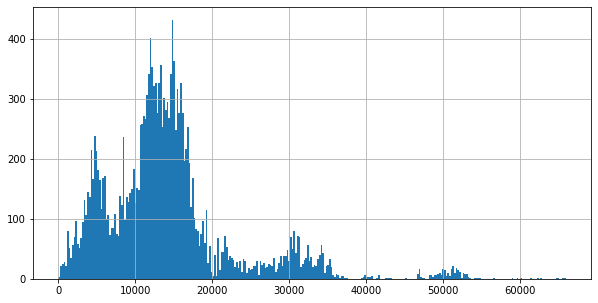

In [60]:
df28_6['cityCenters_nearest'].hist(figsize = (10, 5), bins=300, range=(0,66000))

Гистограмма выглядит нормально, теперь сравним её с гистограммой этого же массива, но без значений для Санкт-Петербурга.

<AxesSubplot:>

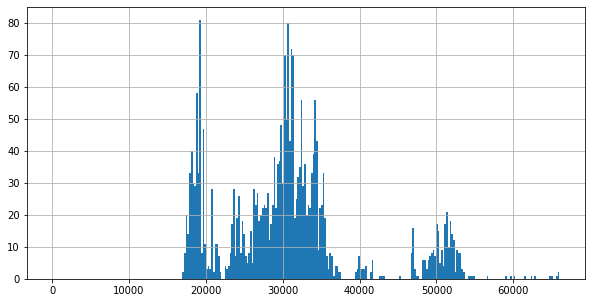

In [61]:
df28_6.query('locality_name_ndx != "Санкт-Петербург" ')['cityCenters_nearest'].hist(figsize = (10, 5), bins=300, range=(0,66000))

In [62]:
df28_6.query('locality_name_ndx != "Санкт-Петербург" ')['cityCenters_nearest'].describe()

count     2460.000000
mean     30616.251220
std       9092.220364
min      17012.000000
25%      24715.000000
50%      30385.000000
75%      33719.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Видим, что минимальное значение 9000 м, значит скорее всего расстояние в столбце 'cityCenters_nearest' измеряется от центра Санкт-Петербурга.

**Итак, 5342 строки отражают населенные пункты, по которым нет картографических данных. При этом мы выяснили, что расстояние в столбце 'cityCenters_nearest' измеряется от центра Санкт-Петербурга.**

In [63]:
df28_6.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest           9967
ponds_around3000           0
ponds_nearest           8960
days_exposition            0
locality_name_ndx          0
dtype: int64

Допустим, что вокруг объекта нет парков или водоемов, то в значения до ближайших будет пропуск. Докажем от обратного, т.е. попробуем опровергнуть.

In [64]:
# отразим срез с условием количество объектов (парк/водоем) не равен 0 и расстояние до ближайшего объекта - пропуск.
df28_6.query('parks_around3000 != 0 & parks_nearest.isnull() | ponds_around3000 != 0 & ponds_nearest.isnull()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_ndx


**Опровергнуть не получилось, значит пропуски в столбцах 'parks_nearest' и 'ponds_nearest' из-за того, что рядом нет ни парков, ни водоемов.**

Удалять эти строки не будем, в случае необходимости будем работать со срезами.

#### Меняем типы данных

Переведем целые числа в int32. Десятичные округлим до сотых. Значениям столбца 'is_apartment' переведем в логический тип данных. Дата Фрейм визуально будет выглядеть более привычным и наглядным, а данные станут занимать меньше памяти.

In [65]:
clm_int32 = ['total_images', 'last_price', 'rooms', 'floors_total', 'floor', 'balcony', 'days_exposition']
df[clm_int32] = df[clm_int32].astype(np.int32)
df['is_apartment'] = df['is_apartment'].astype(bool)
df['living_area'] = round(df['living_area'], 2)
df['ceiling_height'] = round(df['ceiling_height'], 2)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23246 entries, 0 to 23245
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23246 non-null  int32         
 1   last_price            23246 non-null  int32         
 2   total_area            23246 non-null  float64       
 3   first_day_exposition  23246 non-null  datetime64[ns]
 4   rooms                 23246 non-null  int32         
 5   ceiling_height        23246 non-null  float64       
 6   floors_total          23246 non-null  int32         
 7   living_area           23246 non-null  float64       
 8   floor                 23246 non-null  int32         
 9   is_apartment          23246 non-null  bool          
 10  studio                23246 non-null  bool          
 11  open_plan             23246 non-null  bool          
 12  kitchen_area          23246 non-null  float64       
 13  balcony         

#### Удаляем лишнее

Т.к. столбец 'total_images' нам не понадобиться в анализе данных, то мы его просто удалим.

In [67]:
df = df.drop('total_images', axis=1)

#### Вывод предобработки данных.

Мы неплохо поработали с пропусками: восстановили те данные, которые смогли, удалили случайные пропуски, заменили на медианные значения и оставили те, с которыми не смогли ничего поделать.Нашли аномалии в данных, сформировали вопросы к команде Яндекс Недвижимости, которая предоставила данные.

In [68]:
df.isna().sum()

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5342
cityCenters_nearest      5342
parks_around3000         5342
parks_nearest           15309
ponds_around3000         5342
ponds_nearest           14302
days_exposition             0
locality_name_ndx           0
dtype: int64

### Посчитайте и добавьте в таблицу новые столбцы

#### Столбец цена одного квадратного метра 'square_meter_price'

Добавим в датафрейм столбец 'square_meter_price', которому присвоим значения цены за квадратный метр. Округлим до целого значения.

In [69]:
df['square_meter_price'] = df['last_price'] / df['total_area']
df['square_meter_price'] = round(df['square_meter_price'], 0).astype(np.int32)

#### Столбец день недели публикации объявления 'weekday_exposition'

Добавим в датафрейм столбец 'weekday_exposition', которому присвоим значения дня недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [70]:
df['weekday_exposition'] = df['first_day_exposition'].dt.dayofweek

#### Столбец месяц публикации объявления 'month_exposition'

Добавим в датафрейм столбец 'month_exposition', которому присвоим значения месяца публикации объявления

In [71]:
df['month_exposition'] = df['first_day_exposition'].dt.month

#### Столбец год публикации объявления 'year_exposition'

Добавим в датафрейм столбец 'year_exposition', которому присвоим значения год публикации объявления

In [72]:
df['year_exposition'] = df['first_day_exposition'].dt.year

#### Столбец тип этажа квартиры 'floor_type'

Добавим в датафрейм столбец 'floor_type', которому присвоим значения типа этажа квартиры (значения — «первый», «последний», «другой»)

Напишим функцию, которая будет сравнивать 

In [73]:
def f3(row):
    floor=row['floor']
    floors_total=row['floors_total']
    if floor==1:
        return 'первый'
    if floor==floors_total:
        return 'последний'
    return 'другой'

In [74]:
df['floor_type'] = df.apply(f3,axis=1)

#### Столбец расстояние до центра города в километрах 'cityCenters_nearest_km'

Добавим в датафрейм столбец 'cityCenters_nearest_km', которому присвоим значения расстояния до центра города в километрах. Округлим до целого значения.

In [75]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest_km'], 0)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23246 entries, 0 to 23245
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   last_price              23246 non-null  int32         
 1   total_area              23246 non-null  float64       
 2   first_day_exposition    23246 non-null  datetime64[ns]
 3   rooms                   23246 non-null  int32         
 4   ceiling_height          23246 non-null  float64       
 5   floors_total            23246 non-null  int32         
 6   living_area             23246 non-null  float64       
 7   floor                   23246 non-null  int32         
 8   is_apartment            23246 non-null  bool          
 9   studio                  23246 non-null  bool          
 10  open_plan               23246 non-null  bool          
 11  kitchen_area            23246 non-null  float64       
 12  balcony                 23246 non-null  int32 

### Проведите исследовательский анализ данных

#### Анализ столбцов

##### Анализ общей площади квартиры

Исследуем столбец 'total_area'

In [77]:
df['total_area'].describe()

count    23246.000000
mean        60.042187
std         34.138588
min         14.000000
25%         40.000000
50%         52.000000
75%         69.677500
max        900.000000
Name: total_area, dtype: float64

Видим, что есть выбросы, оценим их построив диаграмму размаха

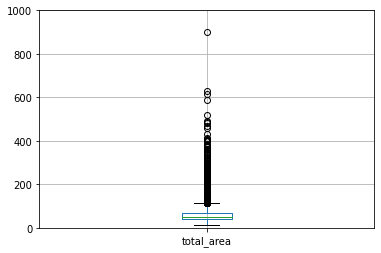

In [78]:
plt.ylim(0,1000)
df.boxplot(column='total_area') 
plt.show()

Оценим гистограмму столбца 'total_area' в пределах "ящика с усами" (Девяностопятипроцентный персентиль Q95 примерно равен 115, тогда возьмем диапазон от 10 до 120)

<AxesSubplot:>

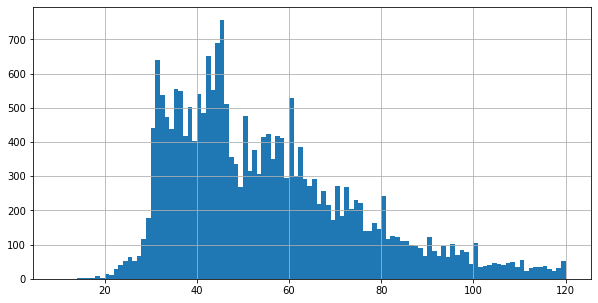

In [79]:
df['total_area'].hist(figsize = (10, 5), bins=110, range=(10,120))

In [80]:
df['total_area'].value_counts().head()

45.0    415
42.0    382
60.0    346
31.0    345
44.0    342
Name: total_area, dtype: int64

**Видим, что есть выбросы по аномальным значениям, есть несколько пиков, в целом графики выглядят правдоподобно. Больше всего квартир имеют площадь 45 м², а половина находится в диапазоне 40 - 69,7 м².**

##### Анализ жилой площади квартиры

Исследуем столбец 'living_area'

In [81]:
df['living_area'].describe()

count    23246.000000
mean        34.460850
std         21.637117
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

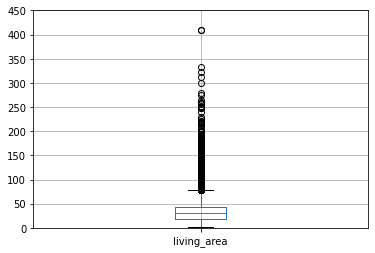

In [82]:
plt.ylim(0,450)
df.boxplot(column='living_area') 
plt.show()

Оценим гистограмму столбца 'living_area' в пределах "ящика с усами" (Девяностопятипроцентный персентиль Q95 примерно равен 78, тогда возьмем диапазон от 0 до 80)

<AxesSubplot:>

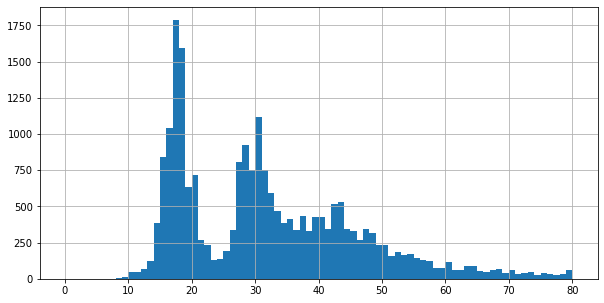

In [83]:
df['living_area'].hist(figsize = (10, 5), bins=80, range=(0,80))

In [84]:
df['living_area'].value_counts().head()

18.0    964
17.0    751
30.0    653
16.0    501
28.0    489
Name: living_area, dtype: int64

**Видим, что есть выбросы по аномальным значениям, есть несколько пиков, в целом графики выглядят правдоподобно. Больше всего квартир имеют площадь 18 м², провал между пиками в 18 м² и 30 м² можно объяснить наличием распределения квартир на студии, однокомнатные, двухкомнатные и т.д.**

##### Анализ площади кухни квартиры

Исследуем столбец 'kitchen_area'

In [85]:
df['kitchen_area'].describe()

count    23246.000000
mean        10.344677
std          5.840549
min          0.000000
25%          7.000000
50%          9.000000
75%         11.800000
max        112.000000
Name: kitchen_area, dtype: float64

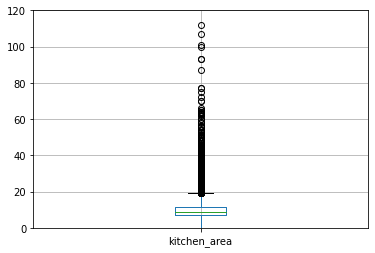

In [86]:
plt.ylim(0,120)
df.boxplot(column='kitchen_area') 
plt.show()

Оценим гистограмму столбца 'kitchen_area' в пределах "ящика с усами" (Девяностопятипроцентный персентиль Q95 примерно равен 19, тогда возьмем диапазон от 0 до 20)

<AxesSubplot:>

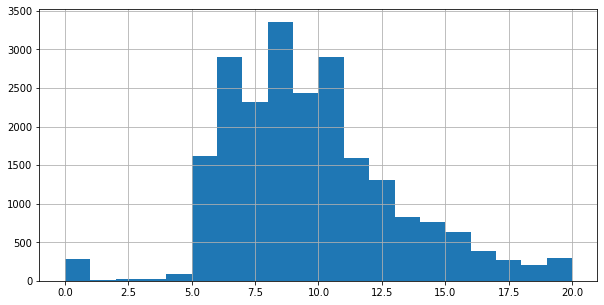

In [87]:
df['kitchen_area'].hist(figsize = (10, 5), bins=20, range=(0,20))

In [88]:
df['kitchen_area'].value_counts().head()

10.0    1436
6.0     1358
9.0     1297
8.0     1241
7.0     1152
Name: kitchen_area, dtype: int64

**Видим, что есть выбросы по аномальным значениям, есть несколько пиков, в целом графики выглядят правдоподобно. Больше всего квартир имеют площадь кухни 10 м², а половина находится в диапазоне 7 - 11,8 м². Пик на значении 0 м² обусловлен наличием квартир студий и квартир с открытой планировкой.**

##### Анализ цены квартиры

Исследуем столбец 'last_price'

In [89]:
df['last_price'].describe()

count    2.324600e+04
mean     6.481401e+06
std      1.061822e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.760000e+06
max      7.630000e+08
Name: last_price, dtype: float64

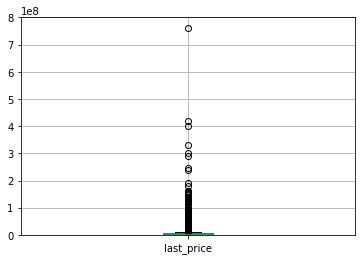

In [90]:
plt.ylim(0,800000000)
df.boxplot(column='last_price') 
plt.show()

Оценим гистограмму столбца 'last_price' в пределах "ящика с усами" (Девяностопятипроцентный персентиль Q95 примерно равен 11725000, тогда возьмем диапазон от 0 до 12000000)

<AxesSubplot:>

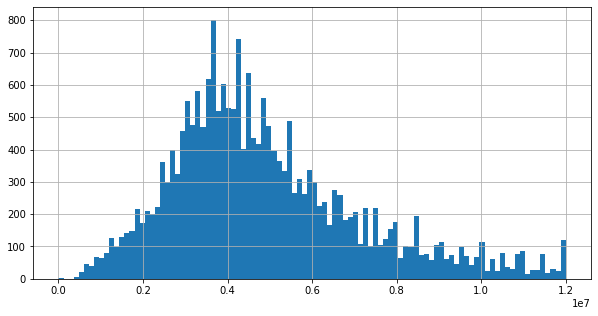

In [91]:
df['last_price'].hist(figsize = (10, 5), bins=100, range=(0,12000000))

In [92]:
df['last_price'].value_counts().head()

4500000    341
3500000    287
4300000    260
4000000    258
4200000    257
Name: last_price, dtype: int64

**Видим, что есть выбросы по аномальным значениям, в целом графики выглядят правдоподобно. Больше всего квартир продаются за 4500000, а половина находится в диапазоне цен 3450000 - 6760000.**

##### Анализ количества комнат квартиры

Исследуем столбец 'rooms'

In [93]:
df['rooms'].describe()

count    23246.000000
mean         2.070464
std          1.075002
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

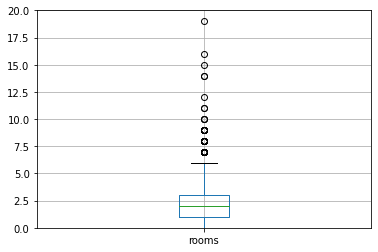

In [94]:
plt.ylim(0,20)
df.boxplot(column='rooms') 
plt.show()

<AxesSubplot:>

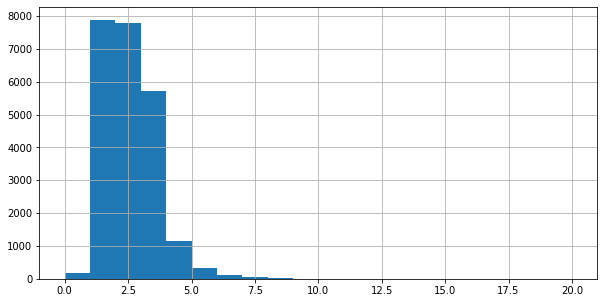

In [95]:
df['rooms'].hist(figsize = (10, 5), bins=20, range=(0,20))

In [96]:
df['rooms'].value_counts().head()

1    7880
2    7792
3    5726
4    1158
5     314
Name: rooms, dtype: int64

**Видим, что есть выбросы по аномальным значениям, в целом графики выглядят правдоподобно. Больше всего квартир имеют 1 комнату, а большинство находится в диапазоне 1 - 3 комнаты.**

##### Анализ высоты потолков квартиры

Исследуем столбец 'ceiling_height'

In [97]:
df['ceiling_height'].describe()

count    23246.000000
mean         2.703008
std          0.224570
min          2.200000
25%          2.550000
50%          2.700000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

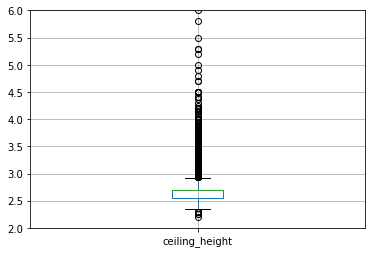

In [98]:
plt.ylim(2,6)
df.boxplot(column='ceiling_height') 
plt.show()

<AxesSubplot:>

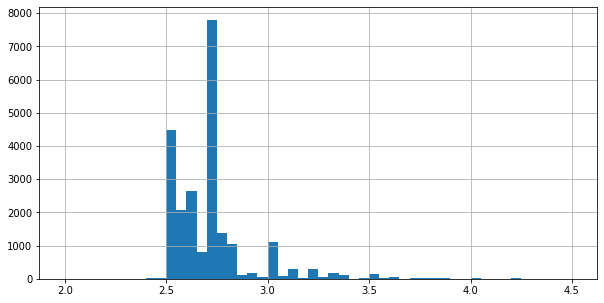

In [99]:
df['ceiling_height'].hist(figsize = (10, 5), bins=50, range=(2,4.5))

In [100]:
df['ceiling_height'].value_counts().head()

2.70    7694
2.50    4164
2.60    2123
2.55    1606
2.75    1183
Name: ceiling_height, dtype: int64

**Больше всего квартир имеют высоту потолков 2,7 м. Это обуславливается тем, что большое количество пропусков, на этапе предобработки, мы заполнили медианным значением по городам. Больше всего значений в диапазоне 2,55 - 2,7 м.**

##### Анализ этажа квартиры

Исследуем столбец 'floor'

In [101]:
df['floor'].describe()

count    23246.000000
mean         5.880022
std          4.870296
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

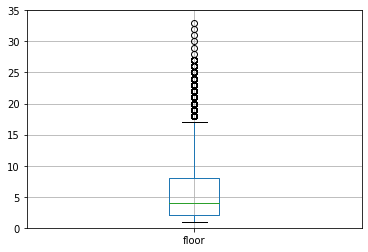

In [102]:
plt.ylim(0,35)
df.boxplot(column='floor') 
plt.show()

<AxesSubplot:>

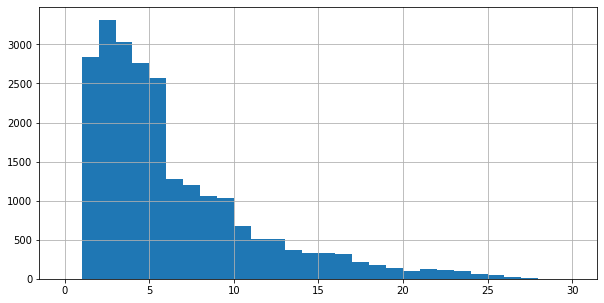

In [103]:
df['floor'].hist(figsize = (10, 5), bins=30, range=(0, 30))

In [104]:
df['floor'].value_counts().head()

2    3313
3    3028
1    2845
4    2760
5    2573
Name: floor, dtype: int64

**Видим, что есть выбросы по аномальным значениям, в целом графики выглядят правдоподобно. Больше всего квартир продаются на 2 этаже, а большинство находится в диапазоне 1 - 5 этажей.**

##### Анализ типа этажа квартиры («первый», «последний», «другой»)

Исследуем столбец 'floor_type'

In [105]:
df['floor_type'].value_counts().head()

другой       17135
последний     3266
первый        2845
Name: floor_type, dtype: int64

<AxesSubplot:>

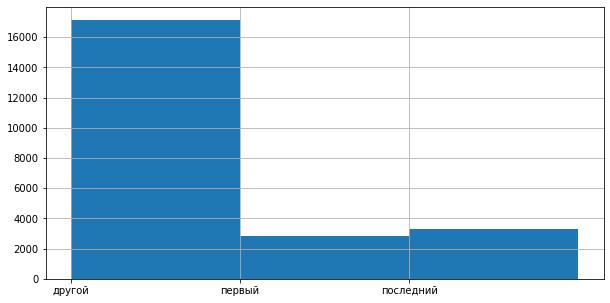

In [106]:
df['floor_type'].hist(figsize = (10, 5), bins=3, range=(0, 3))

**Этажей с типом "другой" больше всех, что логично. На последнем этаже выставлялось больше квартир, чем на первом.**

##### Анализ общего количества этажей в доме

Исследуем столбец 'floors_total'. Стоит отметить, что мы уже находили аномалии в исходных данных этого столбца.

In [107]:
df['floors_total'].describe()

count    23246.000000
mean        10.674137
std          6.579836
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

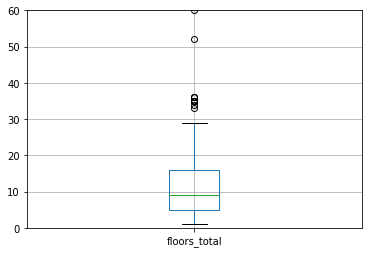

In [108]:
plt.ylim(0,60)
df.boxplot(column='floors_total') 
plt.show()

<AxesSubplot:>

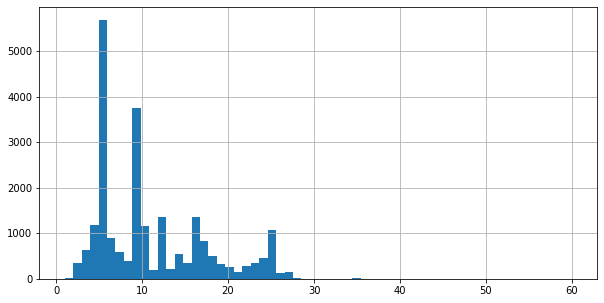

In [109]:
df['floors_total'].hist(figsize = (10, 5), bins=60, range=(1, 60))

In [110]:
df['floors_total'].value_counts().head()

5     5688
9     3748
16    1356
12    1354
4     1180
Name: floors_total, dtype: int64

**Гистограмма выглядит странно, нет ярко выраженного распределения Пуассона. Видим только 2 выраженных пика: 5 этаж и 9 этаж. Возможно, это связано с аномалиями, найденными ранее.**

##### Анализ расстояния от квартиры до центра города в метрах

Исследуем столбец 'cityCenters_nearest'. Стоит отметить, что ранее мы уже определили, что есть населенные пункты, по которым эти данные отсутствуют.

In [111]:
df['cityCenters_nearest'].describe()

count    17904.000000
mean     14204.383210
std       8618.904155
min        181.000000
25%       9251.250000
50%      13107.000000
75%      16287.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

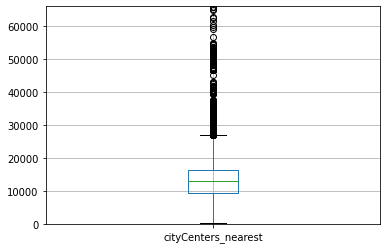

In [112]:
plt.ylim(0,66000)
df.boxplot(column='cityCenters_nearest') 
plt.show()

<AxesSubplot:>

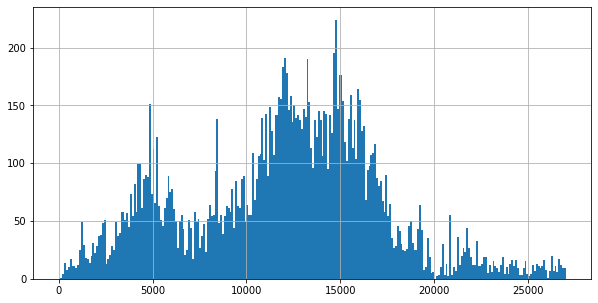

In [113]:
df['cityCenters_nearest'].hist(figsize = (10, 5), bins=270, range=(0, 27000))

**На гистограмме есть 3 ярко выраженных распределения Пуассона, с пиковыми значениями в 5000, 12500 и 15000**

##### Анализ расстояния от квартиры до ближайшего аэропорта

Исследуем столбец 'airports_nearest'. Стоит отметить, что ранее мы уже определили, что есть населенные пункты, по которым эти данные отсутствуют.

In [114]:
df['airports_nearest'].describe()

count    17904.000000
mean     28771.737880
std      12639.126069
min          0.000000
25%      18542.000000
50%      26723.500000
75%      37227.250000
max      84869.000000
Name: airports_nearest, dtype: float64

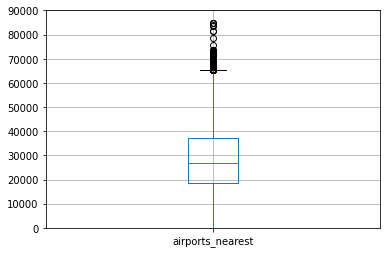

In [115]:
plt.ylim(0,90000)
df.boxplot(column='airports_nearest') 
plt.show()

<AxesSubplot:>

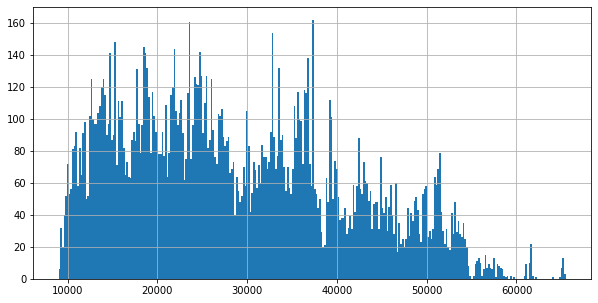

In [116]:
df['airports_nearest'].hist(figsize = (10, 5), bins=300, range=(9000, 65500))

**Видим, что есть выбросы по аномальным значениям, в целом графики выглядят правдоподобно. Провал до 9000 обусловлен тем, что обычно аэропорты находятся за городом.**

##### Анализ расстояния от квартиры до ближайшего парка

Исследуем столбец 'parks_nearest'. Стоит отметить, что ранее мы уже определили, что есть населенные пункты, по которым эти данные отсутствуют.

In [117]:
df['parks_nearest'].describe()

count    7937.000000
mean      490.102810
std       340.272349
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

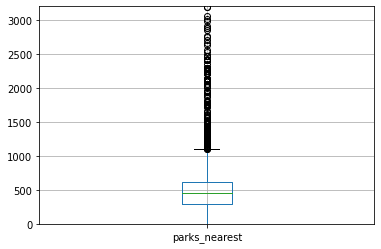

In [118]:
plt.ylim(0,3200)
df.boxplot(column='parks_nearest') 
plt.show()

<AxesSubplot:>

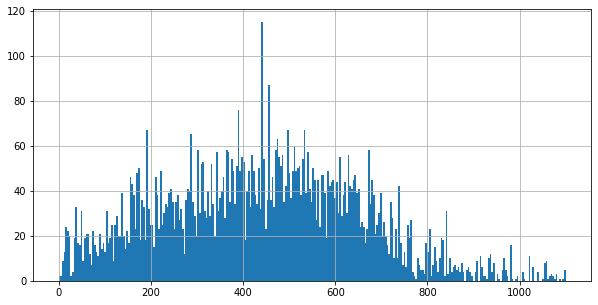

In [119]:
df['parks_nearest'].hist(figsize = (10, 5), bins=300, range=(0, 1100))

In [120]:
df['parks_nearest'].value_counts().head()

441.0    65
392.0    41
456.0    40
173.0    38
471.0    30
Name: parks_nearest, dtype: int64

**Видим, что есть выбросы по аномальным значениям, в целом графики выглядят правдоподобно. Больше всего парков в 441 м от продаваемых квартир, при этом чаще всего квартиры располагаются в диапазоне 288 - 612 м от парка.**

##### Анализ дня и месяца публикации объявления

Исследуем столбецы 'weekday_exposition' и 'month_exposition'.

<AxesSubplot:>

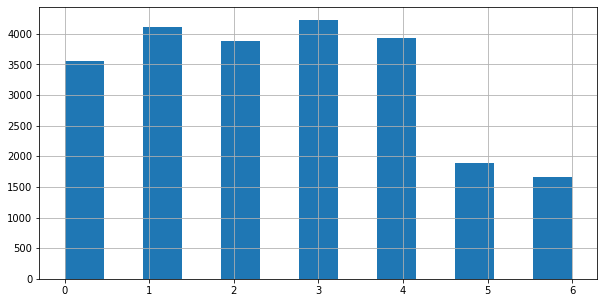

In [121]:
df['weekday_exposition'].hist(figsize = (10, 5), bins=13, range=(0, 6))

<AxesSubplot:>

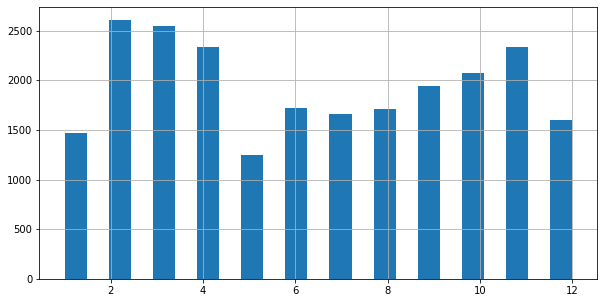

In [122]:
df['month_exposition'].hist(figsize = (10, 5), bins=23, range=(1, 12))

**Видим, что объявления чаще всего размещают в рабочие дни февраля, марта, апреля и ноября.**

#### Анализ времени продажи квартиры

Исследуем столбец 'days_exposition'

In [123]:
df['days_exposition'].describe()

count    23246.000000
mean       186.227609
std        233.735694
min          0.000000
25%         43.000000
50%         94.000000
75%        238.000000
max       1618.000000
Name: days_exposition, dtype: float64

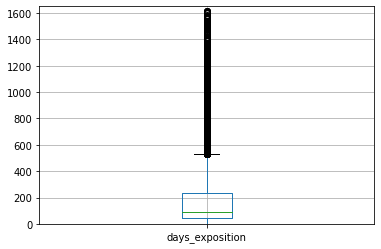

In [124]:
plt.ylim(0,1650)
df.boxplot(column='days_exposition') 
plt.show()

<AxesSubplot:>

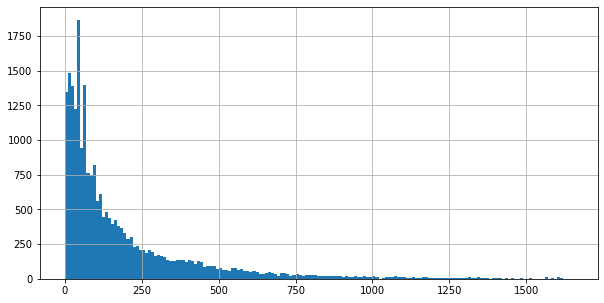

In [125]:
df['days_exposition'].hist(figsize = (10, 5), bins=165, range=(0, 1650))

In [126]:
df['days_exposition'].value_counts().head(10)

45    882
60    547
7     266
30    230
4     208
90    189
3     179
11    177
5     167
15    167
Name: days_exposition, dtype: int64

**График выглядит достоверным, но есть аномальные пики на значениях: 30, 45, 60 и 90 дней. Возможно это связано с работой сервиса Яндекс Недвижимость, который пытается бороться с неактивными объявлениями и автоматически закрывает их каждые 15 дней после размещения. В первый месяц люди еще следят за актуальностью объявления, поэтому пики не такие сильные как во второй месяц. После же второго месяца пики не такие сильные, потому что сервис уже отфильтровал не актуализированные объявления во второй месяц.<br><br>
Значения 7, 4, 3, 5 выглядят достоверными, это можно назвать быстрыми продажами. Медианное значение - 94 дня. Среднеарифметическое - 186 дней.**

#### Анализ факторов, влияющих на общую (полную) стоимость объекта


##### Зависимость цены от общей площади

Возьмем срез данных на основе диаграмм распределения из пункта 4.1, уберем выбросы находящиеся за 1.5 межквартальным интервалом.

<AxesSubplot:xlabel='last_price'>

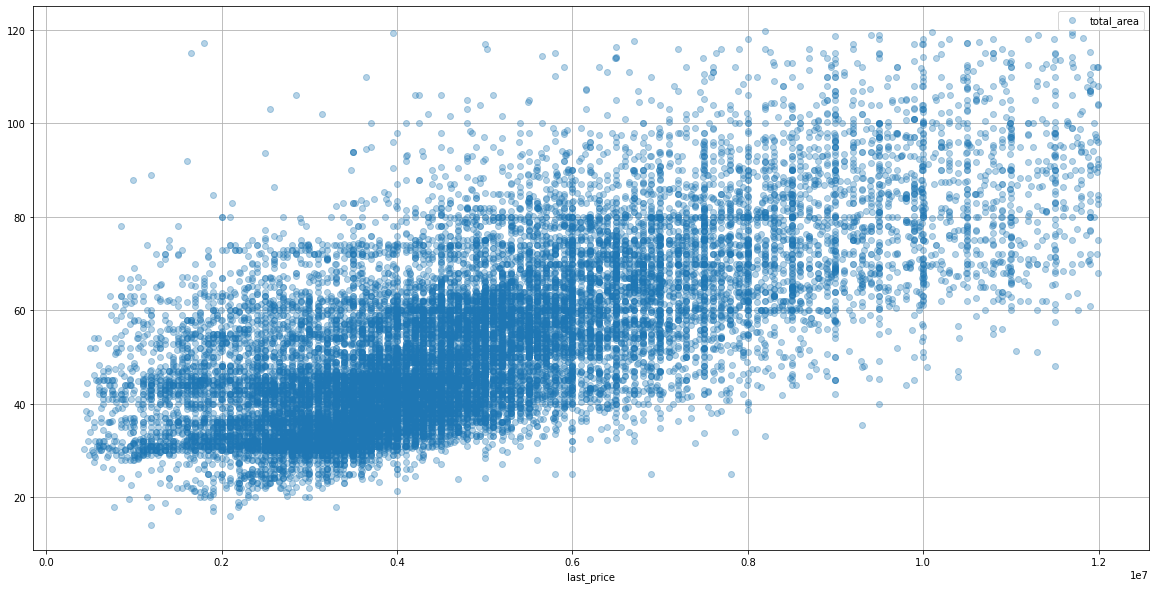

In [127]:
(df.query('100000 < last_price < 12000000 & 4 < total_area < 120')
    .sort_values(by='last_price',ascending=True)
    .plot(x='last_price',y='total_area',grid=True, style='o', alpha=0.33, figsize=(20,10))
)

In [128]:
df.query('100000 < last_price < 12000000 & 4 < total_area < 120')['last_price'].corr(df.query('100000 < last_price < 12000000 & 4 < total_area < 120')['total_area'])

0.7016994631049055

**Стоимость квартиры коррелирует с общей площадью на коэфф Пирсона 0.7, корреляция положительная, значит величины прямо связаны друг с другом. Чем больше общая площадь, тем выше стоимость квартиры.**

##### Зависимость цены от жилой площади

Возьмем срез данных на основе диаграмм распределения из пункта 4.1, уберем выбросы находящиеся за 1.5 межквартальным интервалом.

<AxesSubplot:xlabel='last_price'>

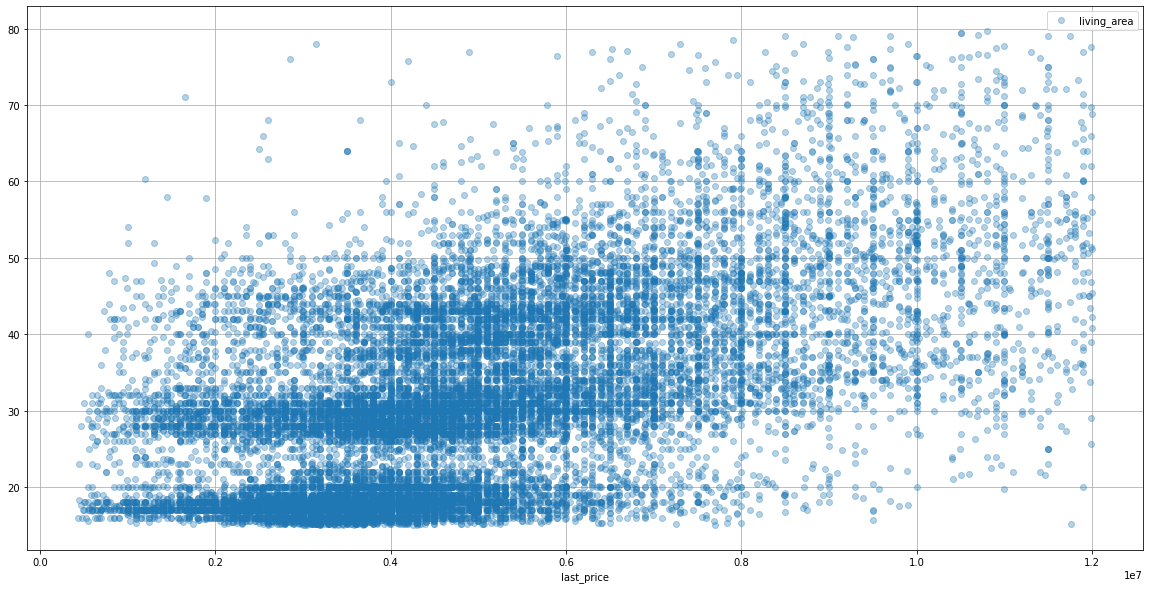

In [129]:
(df.query('100000 < last_price < 12000000 & 15 < living_area < 80')
    .sort_values(by='last_price',ascending=True)
    .plot(x='last_price',y='living_area',grid=True, style='o', alpha=0.33, figsize=(20,10))
)

In [130]:
df.query('100000 < last_price < 12000000 & 15 < living_area < 80')['last_price'].corr(df.query('100000 < last_price < 12000000 & 15 < living_area < 80')['living_area'])

0.5778059050119986

**Стоимость квартиры коррелирует с жилой площадью на коэфф Пирсона 0.58, корреляция положительная, значит величины прямо связаны друг с другом. Чем больше жилая площадь, тем выше стоимость квартиры.**

##### Зависимость цены от площади кухни

Возьмем срез данных на основе диаграмм распределения из пункта 4.1, уберем выбросы находящиеся за 1.5 межквартальным интервалом.

<AxesSubplot:xlabel='last_price'>

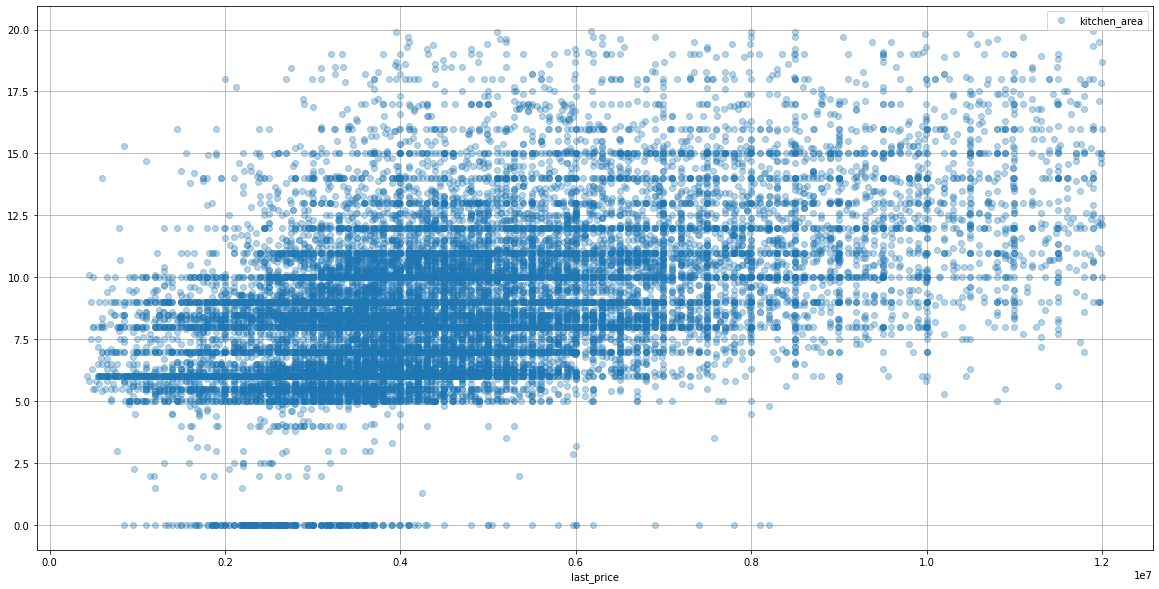

In [131]:
(df.query('100000 < last_price < 12000000 & kitchen_area < 20')
    .sort_values(by='last_price',ascending=True)
    .plot(x='last_price',y='kitchen_area',grid=True, style='o', alpha=0.33, figsize=(20,10))
)

In [132]:
df.query('100000 < last_price < 12000000 & kitchen_area < 20')['last_price'].corr(df.query('100000 < last_price < 12000000 & kitchen_area < 20')['kitchen_area'])

0.49129229748605663

**Стоимость квартиры коррелирует с жилой площадью на коэфф Пирсона 0.49, корреляция положительная, значит величины прямо связаны друг с другом. Чем больше площадь кухни, тем выше стоимость квартиры.**

##### Зависимость цены от количества комнат

Возьмем срез данных на основе диаграмм распределения из пункта 4.1, уберем выбросы находящиеся за 1.5 межквартальным интервалом.

<AxesSubplot:xlabel='rooms'>

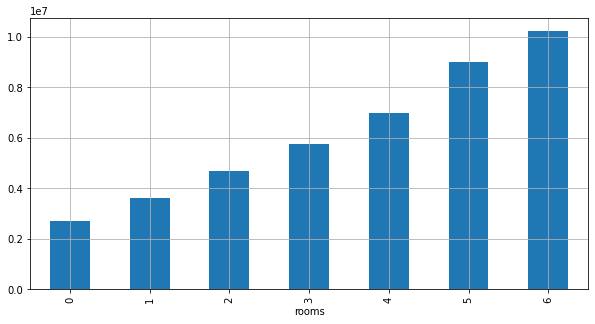

In [133]:
(df.query('100000 < last_price < 12000000')
    .groupby('rooms')['last_price'].median()
    .plot(kind='bar', x='last_price', y='rooms', grid=True, figsize=(10,5))
)

In [134]:
df.query('100000 < last_price < 12000000')['last_price'].corr(df.query('100000 < last_price < 12000000')['rooms'])

0.4567460184233864

**Стоимость квартиры коррелирует с количеством комнат на коэфф Пирсона 0.46, корреляция положительная, значит величины прямо связаны друг с другом. Чем больше количество комнат, тем выше стоимость квартиры.**

##### Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)

Возьмем срез данных на основе диаграмм распределения из пункта 4.1, уберем выбросы находящиеся за 1.5 межквартальным интервалом.

<AxesSubplot:xlabel='floor_type'>

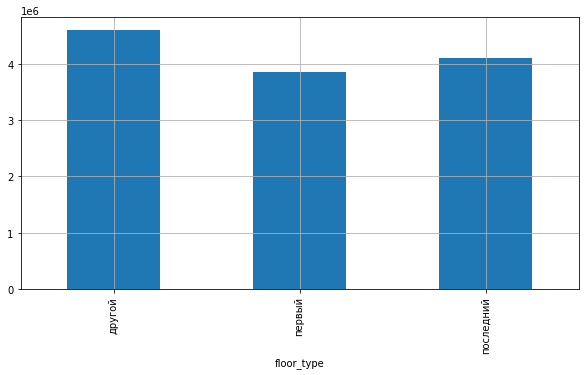

In [135]:
(df.query('100000 < last_price < 12000000')
    .groupby('floor_type')['last_price'].median()
    .plot( kind='bar', x='last_price', y='floor_type', grid=True, figsize=(10,5))
)

**На графике мы видим, что дешевле всего квартиры на первом этаже, на последнем чуть дороже и самые дорогие где-то между первым и последним.**

##### Зависимость цены от даты размещения (день недели, месяц, год)

Возьмем срез данных на основе диаграмм распределения из пункта 4.1, уберем выбросы находящиеся за 1.5 межквартальным интервалом.

<AxesSubplot:xlabel='weekday_exposition'>

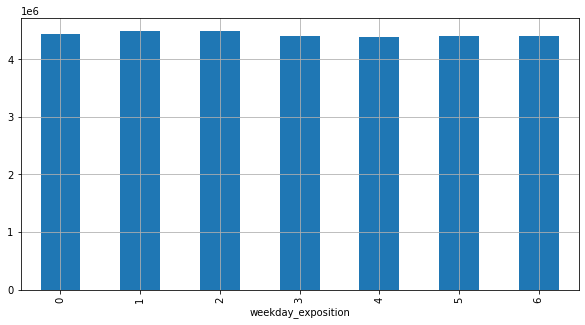

In [136]:
(df.query('100000 < last_price < 12000000')
    .groupby('weekday_exposition')['last_price'].median()
    .plot( kind='bar', x='weekday_exposition', y='floor_type', grid=True, figsize=(10,5))
)

In [137]:
(df.query('100000 < last_price < 12000000').groupby('weekday_exposition')['last_price'].median())

weekday_exposition
0    4450000
1    4500000
2    4500000
3    4400000
4    4390000
5    4400000
6    4400000
Name: last_price, dtype: int32

**Мы видим, что цена не зависит от дня размещения.**

<AxesSubplot:xlabel='month_exposition'>

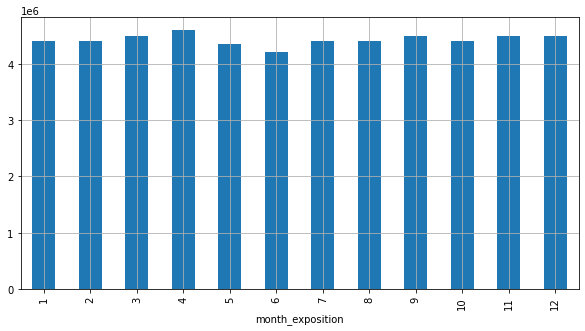

In [138]:
(df.query('100000 < last_price < 12000000')
    .groupby('month_exposition')['last_price'].median()
    .plot( kind='bar', x='month_exposition', y='floor_type', grid=True, figsize=(10,5))
)

In [139]:
(df.query('100000 < last_price < 12000000').groupby('month_exposition')['last_price'].median())

month_exposition
1     4400000
2     4400000
3     4490000
4     4592500
5     4350000
6     4210000
7     4400000
8     4400000
9     4499000
10    4400000
11    4499500
12    4500000
Name: last_price, dtype: int32

**Мы видим, что цена не зависит от месяца размещения.**

<AxesSubplot:xlabel='year_exposition'>

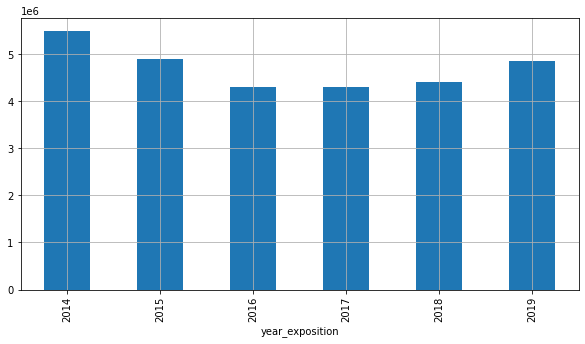

In [140]:
(df.query('100000 < last_price < 12000000')
    .groupby('year_exposition')['last_price'].median()
    .plot( kind='bar', x='year_exposition', y='floor_type', grid=True, figsize=(10,5))
)

In [141]:
(df.query('100000 < last_price < 12000000').groupby('year_exposition')['last_price'].median())

year_exposition
2014    5500000
2015    4890000
2016    4300000
2017    4300000
2018    4400000
2019    4850000
Name: last_price, dtype: int32

**Мы видим, что наивысшая цена на квартиры была в 2014 году, в 2015 и 2019 были средние цены, а в 2016, 2017 и 2018 годах были самые низкие цены.**

#### Найдем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений

Сделаем сводную таблицу, где индексом будут названия населенных пунктов, а столбцы - количество объявлений и среднеарифметическое значение цены квадратного метра в населенном пункте. Отсортируем таблицу по столбцу с количеством объявлений (по убыванию) и выведем первые 10 строк.

In [142]:
square_meter_price_cities = df.pivot_table(index = 'locality_name_ndx', values = 'square_meter_price', aggfunc = ('count', np.mean))
square_meter_price_cities.sort_values(by = 'count', ascending = False).head(10)

,count,mean
locality_name_ndx,,
Санкт-Петербург,15501.0,114536.365783
Мурино,565.0,86092.785841
Кудрово,460.0,95210.304348
Шушары,439.0,78551.359909
Всеволожск,396.0,68758.229798
Пушкин,365.0,102828.038356
Колпино,337.0,75408.341246
Парголово,326.0,90332.236196
Гатчина,307.0,68746.110749


**Из таблицы видно, что среди 10 населенных пунктов с наибольшим числом объявлений:**
- в Санкт-Петербурге самая высокая стоимость среднего арифметического квадратного метра - 114536.36
- в Выборге самая низкая стоимость среднего арифметического квадратного метра - 58238.15

#### Найдем среднюю цену каждого километра от центра Санкт-Петербурга

Сделаем срез данных по Санкт-Петербургу и на основе этого среза сделаем таблицу, где индексом будет расстояние от центра города, а столбцами значения количества объявлений и медианное значение средней цены за квадратный метр для этого расстояния.

In [143]:
df45 = df.query('locality_name_ndx == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest_km', values = 'square_meter_price', aggfunc = ('count', 'median'))
df45

,count,median
cityCenters_nearest_km,,
0.0,27.0,172619.0
1.0,191.0,127731.0
2.0,306.0,123035.5
3.0,346.0,108469.5
4.0,681.0,117391.0
5.0,901.0,126866.0
6.0,606.0,129960.5
7.0,415.0,126860.0
8.0,590.0,122565.0


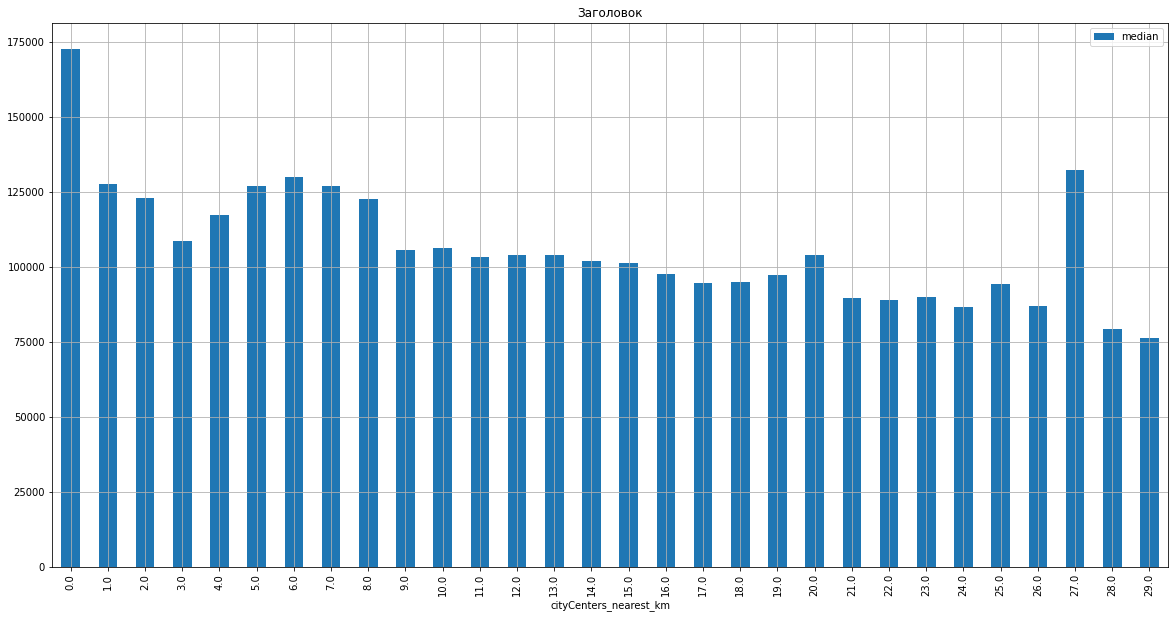

In [144]:
(df45
    .sort_values(by='cityCenters_nearest_km',ascending=True)
    .plot( kind='bar', use_index=True, y='median', grid=True, figsize=(20,10), title = 'Заголовок')
)
plt.show()

In [145]:
df45 = df45.reset_index()
df45['cityCenters_nearest_km'].corr(df45['median'])

-0.7406252220146221

**Расстояние от центра города коррелирует со средней стоимостью квадратного метра на коэфф Пирсона -0.74, корреляция отрицательная, значит величины обратно связаны друг с другом. Чем дальше от центра города, тем ниже стоимость квадратного метра. Аномальный пик на значении 27 км связан с низким количеством значений соответствующих 27 км в выборке.**

### Общий вывод

При предобработке данных у нас возник вопрос по исходному датафрейму: непонятно какие значения отражает столбец 'floors_total'. Мы нашли пропуски в данных для столбцов 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000' и 'ponds_nearest', и охарактеризовали их отсутствием картографических данных по некоторым населенным пунктам. Еще мы определили, что столбец 'cityCenters_nearest' отражает расстояние от центра города Санкт-Петербург.<br><br>
После исследовательского анализа выяснили, что больше всего квартир имеет:
 - общую площадь 45 м²
 - жилую площадь 18 м²
 - площадь кухни 10 м²
 - цену продажи 4 500 000
 - 1 или 2 комнаты
 - высоту потолков 2,7 м
 - располагаются на 1-5 этажах
 - удалены на 10-17 км от центра Санкт-Петербурга и на 9 и более км от аэропорта
 - располагают в 288 - 612 м от парка
 - объявление чаще всего размещают в будние дни

Так же мы выяснили, что медианное значение времени продажи квартиры - 94 дня, а среднеарифметическое - 186, при этом велико значение быстрых продаж в 1-7 дней. Аномальные значения в 30, 45, 60, 90 дней, возможно связаны со спецификой работы сервиса.<br><br>
Цена продажи напрямую зависит от площади (общей, жилой и куханной), количества комнат. Чем выше эти параметры, тем выше цена квартиры. При этом средняя цена квадратного метра имеет обратную зависимость от расстояния до центра Санкт-Петербурга (чем дальше, тем ниже цена квадратного метра). Этот вывод наглядно подтверждает и анализ квадратного метра по 10 населенным пунктам с самым большим количеством объявлений (в Санкт-Петербурге самый высокий показатель: 114536.36, а в Выборге самый низкий: 58238.15)

### Дополнение

#### Анализ времени продажи квартиры

In [146]:
import seaborn as sns

In [147]:
df['days_exposition'].describe()

count    23246.000000
mean       186.227609
std        233.735694
min          0.000000
25%         43.000000
50%         94.000000
75%        238.000000
max       1618.000000
Name: days_exposition, dtype: float64

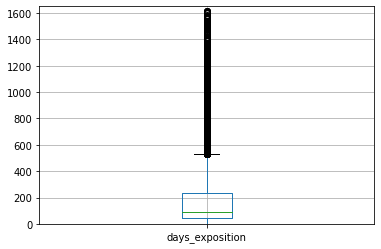

In [148]:
plt.ylim(0,1650)
df.boxplot(column='days_exposition') 
plt.show()

<AxesSubplot:>

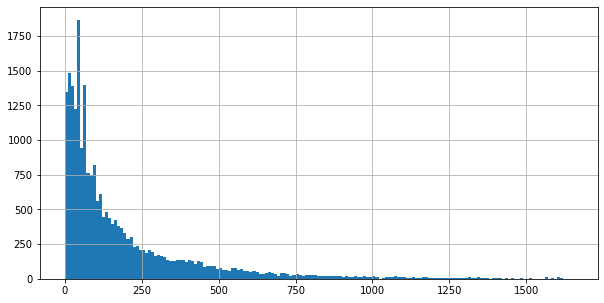

In [149]:
df['days_exposition'].hist(figsize = (10, 5), bins=165, range=(0, 1650))

Гистограмма на мой взгляд нормальная, в графике визуально читается гипербола (y = k/x) в первой координатной оси. Так же видны аномильные пики. Давайте укрупним гистограмму.

<AxesSubplot:>

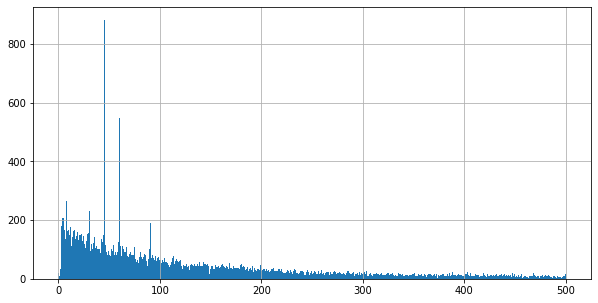

In [150]:
df['days_exposition'].hist(figsize = (10, 5), bins=500, range=(0, 500))

И еще укрупним

<AxesSubplot:>

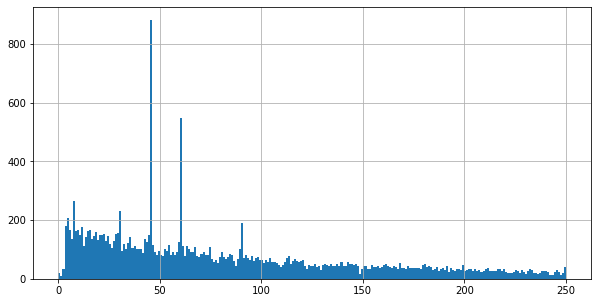

In [151]:
df['days_exposition'].hist(figsize = (10, 5), bins=250, range=(0, 250))

Аномальные пики стали нагляднее. Проанализируем их.

In [152]:
df['days_exposition'].value_counts().head(10)

45    882
60    547
7     266
30    230
4     208
90    189
3     179
11    177
5     167
15    167
Name: days_exposition, dtype: int64

**График выглядит достоверным, но есть аномальные пики на значениях: 30, 45, 60 и 90 дней. Возможно это связано с работой сервиса Яндекс Недвижимость, который пытается бороться с неактивными объявлениями и автоматически закрывает их каждые 15 дней после размещения. В первый месяц люди еще следят за актуальностью объявления, поэтому пики не такие сильные как во второй месяц. После же второго месяца пики не такие сильные, потому что сервис уже отфильтровал не актуализированные объявления во второй месяц.<br><br>
Значения 7, 4, 3, 5 выглядят достоверными, это можно назвать быстрыми продажами. Медианное значение - 94 дня. Среднеарифметическое - 186 дней.**

#### Зависимость цены от даты размещения

Возьмем медианные значения цены, площади и цены за кв м и сгруппируем по годам.

In [153]:
df62_1 = df.query('100000 < last_price < 12000000').groupby('year_exposition')['last_price'].median().reset_index()
df62_2 = df.query('100000 < last_price < 12000000').groupby('year_exposition')['total_area'].median().reset_index()
df62_3 = df.query('100000 < last_price < 12000000').groupby('year_exposition')['square_meter_price'].median().reset_index()
df62 = df62_1.merge(df62_2, on = ['year_exposition'], how = 'left').merge(df62_3, on = ['year_exposition'], how = 'left')
df62

,year_exposition,last_price,total_area,square_meter_price
0,2014,5500000,59.00,94737.0
1,2015,4890000,56.00,89571.0
2,2016,4300000,50.00,89091.0
3,2017,4300000,49.00,90212.5
4,2018,4400000,48.35,94134.5
5,2019,4850000,49.70,101199.0


Переведем значения в относительные, за 100% для каждого столбца представим максимальное значение этого столбца.

In [154]:
df62['last_price'] = round(100 / df62['last_price'].max() * df62['last_price'], 2)
df62['total_area'] = round(100 / df62['total_area'].max() * df62['total_area'], 2)
df62['square_meter_price'] = round(100 / df62['square_meter_price'].max() * df62['square_meter_price'], 2)
df62 = df62.rename(columns = {"year_exposition" : "год","last_price" : "цена продажи (%)","total_area" : "площадь (%)","square_meter_price" : "цена за кв м (%)"})
df62

,год,цена продажи (%),площадь (%),цена за кв м (%)
0,2014,100.00,100.00,93.61
1,2015,88.91,94.92,88.51
2,2016,78.18,84.75,88.04
3,2017,78.18,83.05,89.14
4,2018,80.00,81.95,93.02
5,2019,88.18,84.24,100.00


Визуализируем результат на графике:

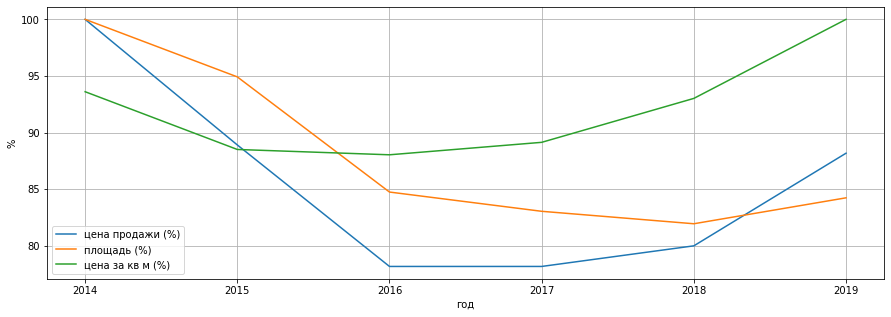

In [155]:
df62.plot(kind='line', x='год', grid=True, figsize=(15,5), xlabel='год', ylabel='%')
plt.show()

**Из графика видно, что цена продажи зависит от цены за кв м и от площади квартиры. С 2014 года по 2016 сильно уменьшилась средняя площадь продаваемых квартир, что привело к спаду средней цены продажи квартиры. При этом с 2017 по 2019 года сильно выросла цена за кв м, что привело к росту средней цены за квартиры.**